In [1]:
import os
import numpy as np
import numpy.testing as npt
from dataclasses import dataclass
from rich.progress import Progress
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegFileWriter

import jax

import jax.numpy as jnp

import micromage as mg
print(f"{mg.dtype=}")

mg.dtype=<class 'jax.numpy.float32'>


In [2]:
# system = mg.System(
#     Lx=18, Ly=18, D=3.5*0, K=7.7*0, H=0, A=1,
#     eta=0.2, jx=0, beta=0.,
# )
system = mg.System(
    Lx=18, Ly=18, D=0, K=0, H=0, A=0,
    eta=0.2, jx=0, beta=0.,
    imp_x=np.array([6],dtype=mg.dtype),
    imp_y=np.array([7],dtype=mg.dtype),
    imp_K=np.array([2],dtype=mg.dtype),    
)

print(system)

comp = mg.Computer2(system)

a = mg.AnalyticA(system=system)

rad0 = 4.
wdt0 = 0.5
p0 = jnp.array([system.Lx/2,system.Ly/2,rad0,wdt0,-np.pi/2,0,0.0])
print(f"Initial parameters {p0}")

print(f"Values at imputirites {a.ansatz(p0, xy=[system.imp_x,system.imp_y]).squeeze()}")

e0 = a.energy(p0)
print(f"Analytic energy {e0}")

sz = np.logspace(1, 3, 10).astype(int)*2
e = np.empty(len(sz), dtype=np.float64)
for k, s in enumerate(sz.astype(int)): 
    a.xy = comp.coordinates(s, s)
    n = a(p0)
    e[k] = comp.energy(n)
    print(f"Size {s}. Energy {e[k]}.")
    

System(A=0, J=1, D=0, H=0, K=0, Lx=18, Ly=18, Ms=1, gamma=1, eta=0.2, beta=0.0, jx=0, jy=0.0, imp_x=array([6.], dtype=float32), imp_y=array([7.], dtype=float32), imp_K=array([2.], dtype=float32))
Initial parameters [ 9.          9.          4.          0.5        -1.57079633  0.
  0.        ]
Values at imputirites [ 0.41780373 -0.6267056  -0.6577843 ]
Analytic energy 0.8653603196144104


/home/igor/Data/Activity/article.syntafm/code/micromage/analytic.py:100: RuntimeWarning: divide by zero encountered in divide
  return np.sinh(rad/wdt)/np.sinh(rho/wdt)


Size 20. Energy 0.6399083733558655.
Size 32. Energy 0.7859706282615662.
Size 54. Energy 0.8653603196144104.
Size 92. Energy 0.863678514957428.
Size 154. Energy 0.8658137917518616.
Size 258. Energy 0.8652837872505188.
Size 430. Energy 0.8653886914253235.
Size 718. Energy 0.8653677105903625.
Size 1198. Energy 0.8653634786605835.
Size 2000. Energy 0.8653607964515686.


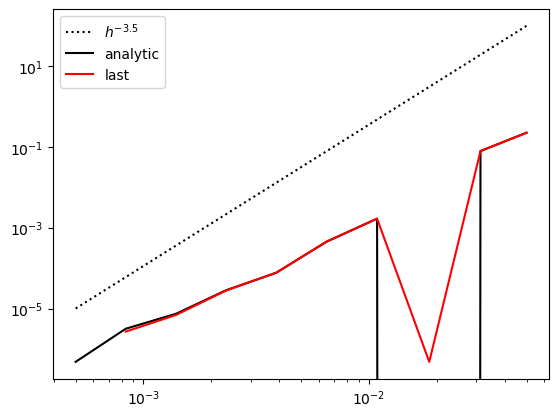

In [3]:
fig, ax = plt.subplots()
ax.loglog(1/sz, 1e2*(sz/sz[0])**(-3.5), ':k', label=r'$h^{-3.5}$')
ax.loglog(1/sz, np.abs(e-e0), '-k', label='analytic')
# ax.loglog(2/(sz[1:]+sz[:-1]), np.abs(e[1:]-e[:-1]), '-r', label='diff')
ax.loglog(1/sz[:-1], np.abs(e[:-1]-e[-1]), '-r', label='last')
ax.legend()


# Derivative test

In [ ]:
system = mg.System(
    Lx=18, Ly=18, D=3.5, K=7.7, H=0, A=1,
    eta=0.2, jx=0, beta=0.,
)
print(system)

a = mg.AnalyticA(system=system)

rad0 = 4.
wdt0 = 0.5
p0 = np.array([system.Lx/2,system.Ly/2,rad0,wdt0,-np.pi/2,0,0.0])
print(f"Initial parameters {p0}")
e0 = a.energy(p0)
print(f"Initial energy {e0}")
de0 = a.d_energy(p0)
print(f"Derivatives of energy {de0}")
npar = de0.shape[0]

epsilons = np.logspace(-5,-1,10)
ntest = epsilons.shape[0]
e = np.zeros((ntest,npar),dtype=np.float64)
for k in range(ntest):
    for j in range(npar):
        p = p0.copy()
        p[j] += epsilons[k]
        e[k,j] = a.energy(p)

diff = e-e0[None]
pred = de0[None]*epsilons[:,None]
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.loglog(epsilons, np.abs(diff-pred), '.-', label=['x','y','R','w','chi','dc','d2c'])
ax.loglog(epsilons, epsilons**2, ':k', label=r'$h^2$')
ax.legend()
plt.show()

In [ ]:
diff[:,2]

In [ ]:
pred[:,2]

In [ ]:
e0, de0[2]

In [ ]:
e[:,2]